# College Admission Prediction

In [100]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

### Data

In [112]:
x = torch.tensor(([420,60],[510,92],[488,80],[533,90],[455,79],[512,78],[485,95],[529,65],[449,82],[540,100]), dtype=torch.float)
y = torch.tensor(([10],[80],[40],[90],[30],[50],[65],[55],[49],[100]), dtype=torch.float)
xPredicted = torch.tensor(([500, 95]), dtype=torch.float)

### Data Augmentation
  Data Augmentation is the process of normalizing the data between 0 -> 1

In [113]:
x_max, _ = torch.max(x, 0) # search column by column, if 1, row by row
xPredicted_max, _ =torch.max(xPredicted, 0)

x = torch.div(x, x_max)
xPredicted = torch.div(xPredicted, x_max)
y = y/100

### Building Model

In [103]:
class Neural_Network(nn.Module):
    def __init__(self,):
        super(Neural_Network, self).__init__()
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 3
        
        # weights
        self.w1 = torch.randn(self.inputSize, self.hiddenSize)
        self.w2 = torch.randn(self.hiddenSize, self.outputSize)
        
        self.z2 = 0
        
    def sigmoid(self,s):
        return 1 / (1+torch.exp(-s))
    
    def sigmoidPrime(self, s):
        return s*(1-s)
        
    def forward(self, x):
        z1 = torch.matmul(x,self.w1)
        self.z2 = self.sigmoid(z1)
        z3 = torch.matmul(self.z2, self.w2)
        output = self.sigmoid(z3)
        return output
    
    def backward(self, x, y, o):
        o_error = y - o # error in output
        o_delta = o_error * self.sigmoidPrime(o)
        z2_error = torch.matmul(o_delta, torch.t(self.w2))
        z2_delta = z2_error * self.sigmoidPrime(self.z2)
        self.w1 += torch.matmul(torch.t(x), z2_delta)
        self.w2 += torch.matmul(torch.t(self.z2), o_delta)
        
    def train(self, x, y):
        o = self.forward(x)
        self.backward(x,y,o)
        
    def saveWeights(self, model):
        torch.save(model, "NN")
        
    def predict(self):
        print("Predicted data based on trained weights: ")
        print("Input (scaled): \n" + str(xPredicted))
        print("Output: \n" + str(self.forward(xPredicted)))

In [104]:
NN = Neural_Network()
l = []
for i in range(1000):
    loss = torch.mean((y - NN(x))**2).detach().item()
    print("#" + str(i) + "Loss: " + str(loss))
    l.append(loss)
    NN.train(x,y)
NN.saveWeights(NN)
NN.predict()

#0Loss: 0.18654851615428925
#1Loss: 0.11001639068126678
#2Loss: 0.07873091846704483
#3Loss: 0.07202556729316711
#4Loss: 0.07048702985048294
#5Loss: 0.06996987015008926
#6Loss: 0.06966652721166611
#7Loss: 0.06941086053848267
#8Loss: 0.06916768103837967
#9Loss: 0.0689295083284378
#10Loss: 0.06869485229253769
#11Loss: 0.06846348941326141
#12Loss: 0.06823543459177017
#13Loss: 0.06801080703735352
#14Loss: 0.06778969615697861
#15Loss: 0.06757215410470963
#16Loss: 0.06735829263925552
#17Loss: 0.06714815646409988
#18Loss: 0.06694178283214569
#19Loss: 0.06673924624919891
#20Loss: 0.06654052436351776
#21Loss: 0.0663456842303276
#22Loss: 0.06615468859672546
#23Loss: 0.06596753746271133
#24Loss: 0.06578420102596283
#25Loss: 0.06560464948415756
#26Loss: 0.06542884558439255
#27Loss: 0.06525672972202301
#28Loss: 0.06508822739124298
#29Loss: 0.06492327153682709
#30Loss: 0.06476177275180817
#31Loss: 0.06460364162921906
#32Loss: 0.06444879621267319
#33Loss: 0.06429712474346161
#34Loss: 0.064148530364036

#502Loss: 0.032810699194669724
#503Loss: 0.03279026225209236
#504Loss: 0.03277015686035156
#505Loss: 0.03275057300925255
#506Loss: 0.03273169323801994
#507Loss: 0.032714080065488815
#508Loss: 0.032698094844818115
#509Loss: 0.032685358077287674
#510Loss: 0.032676465809345245
#511Loss: 0.03267618641257286
#512Loss: 0.032684776932001114
#513Loss: 0.032717302441596985
#514Loss: 0.03276877850294113
#515Loss: 0.03288934752345085
#516Loss: 0.033042240887880325
#517Loss: 0.033401008695364
#518Loss: 0.033766403794288635
#519Loss: 0.03474973887205124
#520Loss: 0.03540768101811409
#521Loss: 0.03782648593187332
#522Loss: 0.03820691257715225
#523Loss: 0.04293719679117203
#524Loss: 0.04076385498046875
#525Loss: 0.04712207615375519
#526Loss: 0.041201960295438766
#527Loss: 0.04721945896744728
#528Loss: 0.0405597984790802
#529Loss: 0.045547954738140106
#530Loss: 0.03980092331767082
#531Loss: 0.04386446997523308
#532Loss: 0.03908476233482361
#533Loss: 0.04240543767809868
#534Loss: 0.038437675684690475
#

/home/logan/anaconda3/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Neural_Network. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


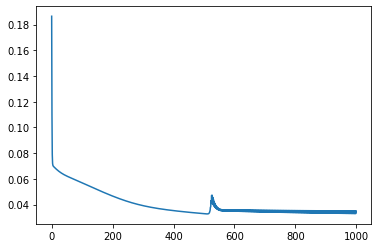

In [105]:
plt.plot(l)